# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [9]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y

X,y = load_dataset()
print(X.shape , y.shape)

(100, 4) (100,)


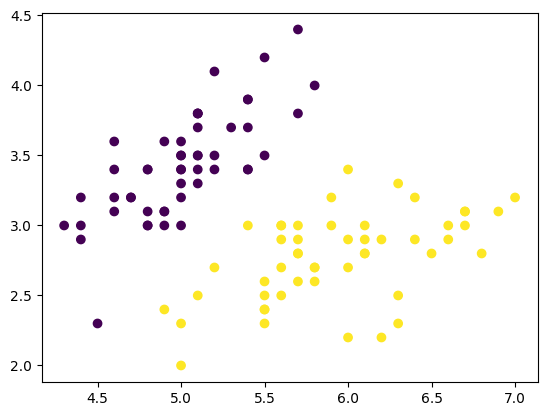

In [10]:
#Trực quan hóa dữ liệu data
plt.scatter (X[:,0], X[:,1], c=y)
plt.show()

Kết quả

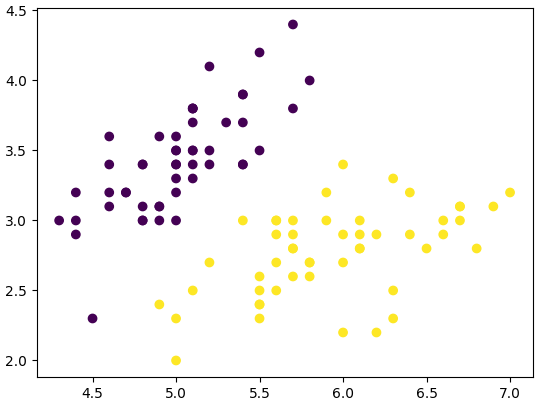

In [11]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)               # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
    
    def forward(self, X):
        return torch.sigmoid(self.linear(X))


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return len(self.X)       #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)
    
    def __getitem__(self, idx):
        X, y = self.X[idx], self.y[idx] 
        return  X.to(device), y.to(device)           #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [20]:
# Tạo dữ liệu
dataset = IrisTorch(X,y)

In [21]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
total = len(dataset)
train_size =  int(0.7 * total)                                            #70%
test_size =   total - train_size                                             #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [22]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [28]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, X):
        X = torch.relu(self.fc1(X))
        X = self.fc2(x)
        return X

In [29]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features) 
criterion = nn.BCELoss()  # Binary Cross Entropy Loss cho bài toán phân loại nhị phân
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [35]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 0.1360, Test Loss: 0.1328, Test Accuracy: 1.0000
Epoch 2/200, Train Loss: 0.1356, Test Loss: 0.1326, Test Accuracy: 1.0000
Epoch 3/200, Train Loss: 0.1352, Test Loss: 0.1338, Test Accuracy: 1.0000
Epoch 4/200, Train Loss: 0.1350, Test Loss: 0.1337, Test Accuracy: 1.0000
Epoch 5/200, Train Loss: 0.1347, Test Loss: 0.1333, Test Accuracy: 1.0000
Epoch 6/200, Train Loss: 0.1342, Test Loss: 0.1329, Test Accuracy: 1.0000
Epoch 7/200, Train Loss: 0.1338, Test Loss: 0.1305, Test Accuracy: 1.0000
Epoch 8/200, Train Loss: 0.1329, Test Loss: 0.1302, Test Accuracy: 1.0000
Epoch 9/200, Train Loss: 0.1325, Test Loss: 0.1278, Test Accuracy: 1.0000
Epoch 10/200, Train Loss: 0.1318, Test Loss: 0.1255, Test Accuracy: 1.0000
Epoch 11/200, Train Loss: 0.1312, Test Loss: 0.1254, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.1308, Test Loss: 0.1248, Test Accuracy: 1.0000
Epoch 13/200, Train Loss: 0.1303, Test Loss: 0.1246, Test Accuracy: 1.0000
Epoch 14/200, Train Loss: 0.1299, 

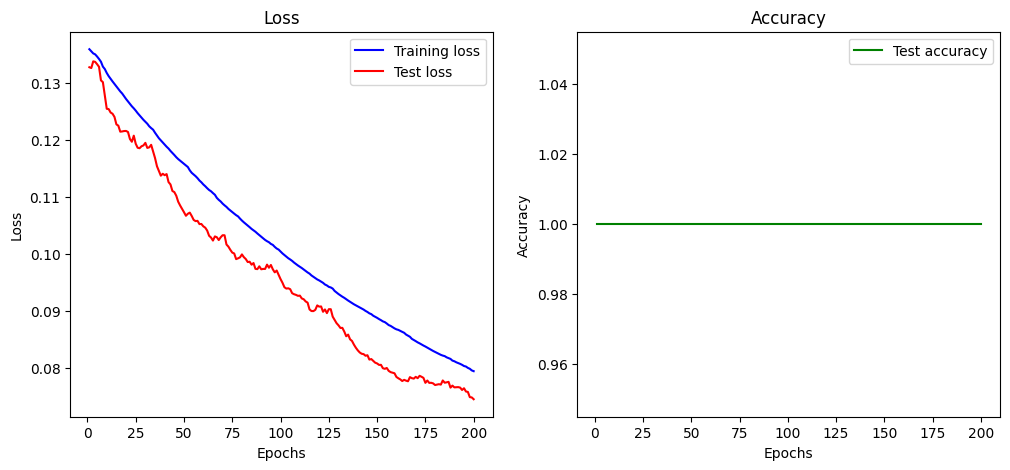

In [36]:
# Vẽ biểu đồ loss và accuracy
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(12, 5))

# Biểu đồ train loss và test loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, test_losses, 'r', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, 'g', label='Test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Kết quả:

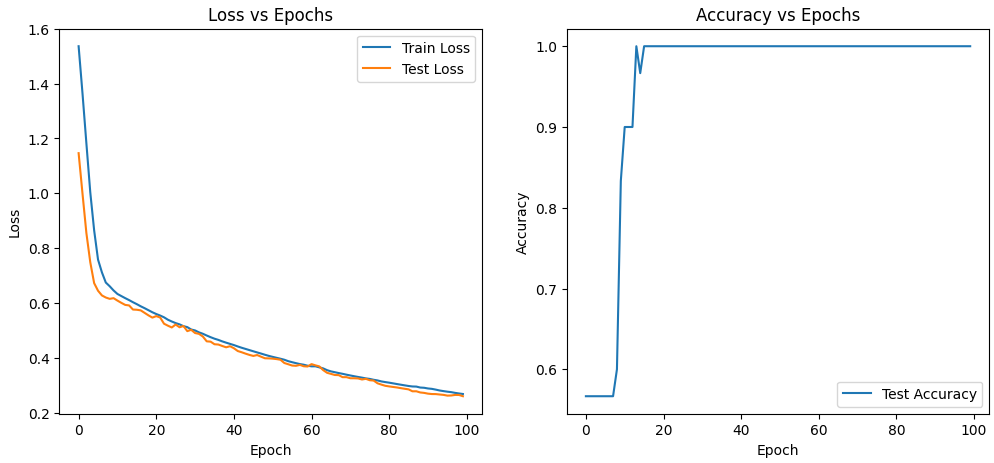